In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore' )

from keras.models import *
from keras.layers import *

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os

In [3]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [5]:
classes = os.listdir(train_path)
classes

['Normal', 'Viral Pneumonia', 'Covid']

In [6]:
# Data Augmentation 
train_gen = ImageDataGenerator(
    rescale = 1 / 255,
    rotation_range=20,          # Randomly rotate images up to 20 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally
    height_shift_range=0.1,     # Randomly shift images vertically
    shear_range=0.1,            # Apply shear transformations
    zoom_range=0.1,             # Apply random zoom
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy for filling in new pixels
)

In [8]:
train_data = train_gen.flow_from_directory(
    train_path,
    target_size = [150, 150],
    class_mode = 'categorical'
)

Found 251 images belonging to 3 classes.


In [9]:
test_gen = ImageDataGenerator(
    rescale = 1 / 255
)

In [10]:
test_data = test_gen.flow_from_directory(
    test_path,
    target_size = [150, 150],
    class_mode = 'categorical'
)

Found 66 images belonging to 3 classes.


In [17]:
# build CNN Model 

model = Sequential()

# input layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(150, 150, 3),
                 activation = 'relu', padding='same'))

# hidden layers
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(1, 1), activation = 'relu'))  #  3D 

model.add(Flatten())                                      # (1)  3D -> 1D
#model.add(Dense( 216, activation = 'relu'))               # (2)  1D 

# output layer
model.add(Dense(3, activation='softmax'))   #pred class  # (3)

# 1, 2, 3 fully connected layer

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 49, 49, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │        55,299 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,795 (366.39 KB)

 Trainable params: 93,795 (366.39 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
hist = model.fit(train_data, epochs=5 , batch_size=128)

ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>]

In [21]:
model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.6883 - loss: 0.7374


[0.7592156529426575, 0.6969696879386902]

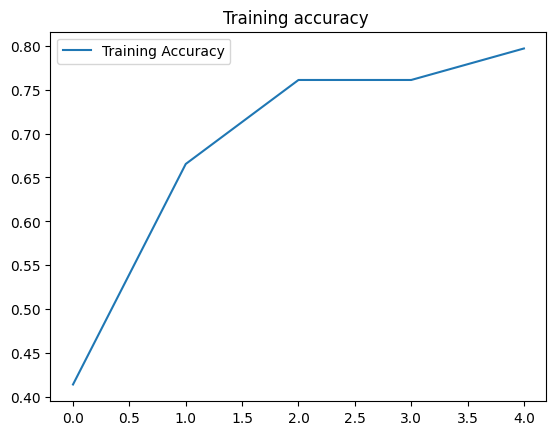

In [24]:
plt.plot(hist.history['accuracy'] , label ='Training Accuracy') # training accuracy
#plt.plot(hist.history['val_accuracy'] , label = 'val accuracy') # val accuracy
plt.legend()
plt.title('Training accuracy ');

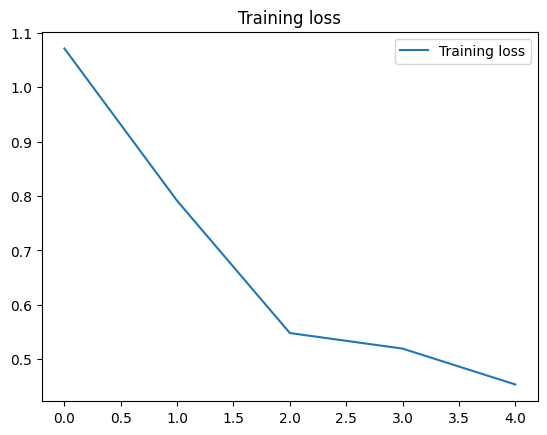

In [25]:
# training loss & validation loss
plt.plot(hist.history['loss'] , label ='Training loss') # training loss
#plt.plot(hist.history['val_loss'] , label = 'val loss') # val loss
plt.legend()
plt.title('Training loss');

In [26]:
 # save model 
model.save('best_cnn_model.h5')

In [27]:
# load pretrained model
from tensorflow.keras.models import load_model

pretrained_model = load_model('/kaggle/working/best_cnn_model.h5')

In [28]:
pretrained_model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.7118 - loss: 0.7201


[0.7592155933380127, 0.6969696879386902]